# Exploration and Comparison of Transformers for Image Classification

## Fine-tuning using Swin Transformer (Swin)

Fine-tuning is an experiment that involves training the entire model on the new task. All of model's parameters are end-to-end fine-tuned on the provided dataset.

The resulting model's performance is the measured on the test split with accuracy metric.

### Swin Transformer (Swin)

Swin Transformer model trained on ImageNet-1k at resolution 224x224. It was introduced in the paper *Swin Transformer: Hierarchical Vision Transformer using Shifted Windows by Liu et al.*

https://arxiv.org/abs/2103.14030

### Prerequisites

Load necessary packages.

In [2]:
import os
os.chdir('..')

import torch

import pandas as pd

from datasets import load_dataset

from src.dataset_builder import ImageDataset
from src.models import *
from src.train import *

from utils.config import Config
from utils.train_utils import *
from utils.models_utils import *
from utils.visualization_utils import *
from utils.data_utils import *

Check if there is GPU available.

In [3]:
get_gpu_info()

GPU 0: NVIDIA A100 80GB PCIe MIG 2g.20gb
VRAM: 19.50 GB


Set manual seed for reproducibility.

In [4]:
id = 10
torch.manual_seed(10)

Load Swin image processor used for image pre-processing.

In [5]:
processor = get_backbone_processor(model_names['Swin'])

Print the pre-processing operations done by the processor.

In [6]:
processor

ViTImageProcessor {
  "do_convert_rgb": null,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "ViTImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

### Data Preprocessing

Load each dataset and its splits.

Processor is automatically applied to each image.

#### RESISC45

In [7]:
resisc45 = load_dataset('timm/resisc45')
clean_labels(resisc45, name='resisc45')
resisc45_train = ImageDataset(
    dataset=resisc45['train'],
    processor=processor,
)
resisc45_validation = ImageDataset(
    dataset=resisc45['validation'],
    processor=processor,
)
resisc45_test = ImageDataset(
    dataset=resisc45['test'],
    processor=processor,
)

#### Food-101

In [8]:
food101 = load_dataset('ethz/food101')
clean_labels(food101, name='food101')
food101_train = ImageDataset(
    dataset=food101['train'],
    processor=processor,
)
food101_validation = ImageDataset(
    dataset=food101['validation'],
    processor=processor,
)

#### FER2013

In [9]:
fer2013 = load_dataset('AutumnQiu/fer2013')
clean_labels(fer2013, name='fer2013')
fer2013_train = ImageDataset(
    dataset=fer2013['train'],
    processor=processor,
)
fer2013_validation = ImageDataset(
    dataset=fer2013['valid'],
    processor=processor,
)
fer2013_test = ImageDataset(
    dataset=fer2013['test'],
    processor=processor,
)

#### PCam

In [10]:
pcam = load_dataset('zacharielegault/PatchCamelyon')
clean_labels(pcam, name='pcam')
pcam_train = ImageDataset(
    dataset=pcam['train'],
    processor=processor,
)
pcam_validation = ImageDataset(
    dataset=pcam['validation'],
    processor=processor,
)
pcam_test = ImageDataset(
    dataset=pcam['test'],
    processor=processor,
)

#### SUN397

In [11]:
sun397 = load_dataset('dpdl-benchmark/sun397')
clean_labels(sun397, name='sun397')
sun397_train = ImageDataset(
    dataset=sun397['train'],
    processor=processor,
)
sun397_validation = ImageDataset(
    dataset=sun397['validation'],
    processor=processor,
)
sun397_test = ImageDataset(
    dataset=sun397['test'],
    processor=processor,
)

#### DTD

In [12]:
dtd = load_dataset('tanganke/dtd')
clean_labels(dtd, name='dtd')
dtd_train = ImageDataset(
    dataset=dtd['train'],
    processor=processor,
)
dtd_test = ImageDataset(
    dataset=dtd['test'],
    processor=processor,
)

### Config

Create a config for experiments and print its settings.

In [13]:
from torch.optim import AdamW

config = Config(
    num_epochs=10, 
    lr=2e-5,
    optimizer=AdamW,
    weight_decay=1e-2
)
config.get_settings()

{'device': 'cuda',
 'criterion': CrossEntropyLoss(),
 'batch_size': 8,
 'lr': 2e-05,
 'num_epochs': 10,
 'optimizer': torch.optim.adamw.AdamW,
 'weight_decay': 0.01}

Create empty array to store dataset accuracies for each experiment.

In [14]:
resisc45_accs = []
food101_accs = []
fer2013_accs = []
pcam_accs = []
sun397_accs = []
dtd_accs = []

### Fine-tuning


Train the entire model and all of its parameters on a new dataset.

#### RESISC45

In [15]:
swin_resisc45 = Backbone(model_names['Swin'], num_classes=len(resisc45_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([45]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([45, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
get_model_params(swin_resisc45)

Parameters: 86.79M


In [17]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = train_model(
    swin_resisc45,
    resisc45_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

100%|██████████| 2363/2363 [06:03<00:00,  6.50it/s]


Epochs: 1/10 | train_loss: 0.4938 | train_acc: 0.8672


100%|██████████| 2363/2363 [05:59<00:00,  6.57it/s]


Epochs: 2/10 | train_loss: 0.1202 | train_acc: 0.9632


100%|██████████| 2363/2363 [05:59<00:00,  6.57it/s]


Epochs: 3/10 | train_loss: 0.0629 | train_acc: 0.9799


100%|██████████| 2363/2363 [05:59<00:00,  6.57it/s]


Epochs: 4/10 | train_loss: 0.0461 | train_acc: 0.9866


100%|██████████| 2363/2363 [06:01<00:00,  6.53it/s]


Epochs: 5/10 | train_loss: 0.0353 | train_acc: 0.9900


100%|██████████| 2363/2363 [06:00<00:00,  6.55it/s]


Epochs: 6/10 | train_loss: 0.0350 | train_acc: 0.9893


100%|██████████| 2363/2363 [05:58<00:00,  6.60it/s]


Epochs: 7/10 | train_loss: 0.0243 | train_acc: 0.9936


100%|██████████| 2363/2363 [06:00<00:00,  6.55it/s]


Epochs: 8/10 | train_loss: 0.0230 | train_acc: 0.9937


100%|██████████| 2363/2363 [06:03<00:00,  6.49it/s]


Epochs: 9/10 | train_loss: 0.0255 | train_acc: 0.9924


100%|██████████| 2363/2363 [06:00<00:00,  6.56it/s]

Epochs: 10/10 | train_loss: 0.0251 | train_acc: 0.9924


In [18]:
resisc45_loss, resisc45_acc, resisc45_per_class_acc = evaluate_model(
    swin_resisc45,
    resisc45_test,
    config
)

100%|██████████| 788/788 [00:50<00:00, 15.69it/s]

test_loss: 0.1638 | test_acc: 0.9581


In [19]:
resisc45_accs.append(resisc45_acc)

In [20]:
get_top_5_accuracies(resisc45_per_class_acc)

[('baseball diamond', 1.0),
 ('chaparral', 1.0),
 ('harbor', 1.0),
 ('roundabout', 1.0),
 ('ship', 1.0)]

In [21]:
get_bottom_5_accuracies(resisc45_per_class_acc)

[('church', 0.8251748251748252),
 ('commercial area', 0.8285714285714286),
 ('wetland', 0.8898305084745762),
 ('medium residential', 0.891156462585034),
 ('rectangular farmland', 0.8962962962962963)]

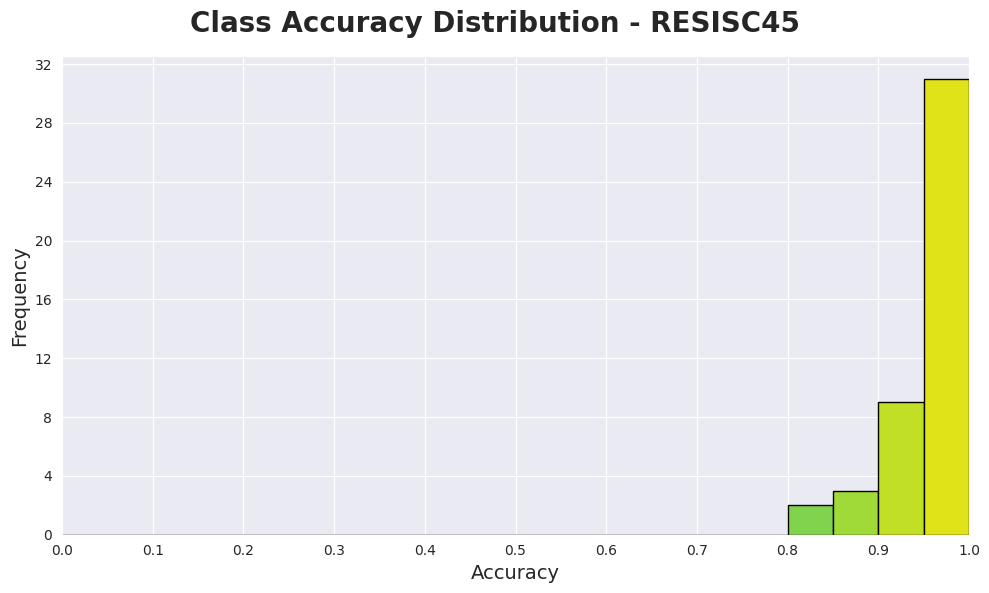

In [22]:
plot_per_class_accuracies(
    resisc45_per_class_acc,
    'RESISC45',
    num_bins=20
)

#### Food-101

In [23]:
swin_food101 = Backbone(model_names['Swin'], num_classes=len(food101_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([101]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([101, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
get_model_params(swin_food101)

Parameters: 86.85M


In [25]:
food101_loss, food101_acc, food101_per_class_acc = train_model(
    swin_food101,
    food101_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

 73%|███████▎  | 6955/9469 [20:12<07:08,  5.87it/s]/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))
100%|██████████| 9469/9469 [27:22<00:00,  5.76it/s]


Epochs: 1/10 | train_loss: 0.8167 | train_acc: 0.7901


100%|██████████| 9469/9469 [27:03<00:00,  5.83it/s]


Epochs: 2/10 | train_loss: 0.3618 | train_acc: 0.8990


100%|██████████| 9469/9469 [26:58<00:00,  5.85it/s]


Epochs: 3/10 | train_loss: 0.1920 | train_acc: 0.9450


100%|██████████| 9469/9469 [26:56<00:00,  5.86it/s]


Epochs: 4/10 | train_loss: 0.1146 | train_acc: 0.9660


100%|██████████| 9469/9469 [26:57<00:00,  5.86it/s]


Epochs: 5/10 | train_loss: 0.0842 | train_acc: 0.9746


100%|██████████| 9469/9469 [27:11<00:00,  5.80it/s]


Epochs: 6/10 | train_loss: 0.0680 | train_acc: 0.9797


100%|██████████| 9469/9469 [27:16<00:00,  5.79it/s]


Epochs: 7/10 | train_loss: 0.0561 | train_acc: 0.9831


100%|██████████| 9469/9469 [27:29<00:00,  5.74it/s]


Epochs: 8/10 | train_loss: 0.0529 | train_acc: 0.9833


100%|██████████| 9469/9469 [26:50<00:00,  5.88it/s]


Epochs: 9/10 | train_loss: 0.0489 | train_acc: 0.9848


100%|██████████| 9469/9469 [26:51<00:00,  5.88it/s]


Epochs: 10/10 | train_loss: 0.0430 | train_acc: 0.9868


In [26]:
food101_loss, food101_acc, food101_per_class_acc = evaluate_model(
    swin_food101,
    food101_validation,
    config
)

100%|██████████| 3157/3157 [04:00<00:00, 13.15it/s]


test_loss: 0.5042 | test_acc: 0.8958


In [27]:
food101_accs.append(food101_acc)

In [28]:
get_top_5_accuracies(food101_per_class_acc)

[('edamame', 0.996),
 ('macarons', 0.988),
 ('oysters', 0.988),
 ('pad thai', 0.988),
 ('hot and sour soup', 0.984)]

In [29]:
get_bottom_5_accuracies(food101_per_class_acc)

[('steak', 0.6),
 ('filet mignon', 0.608),
 ('apple pie', 0.676),
 ('tuna tartare', 0.684),
 ('caprese salad', 0.716)]

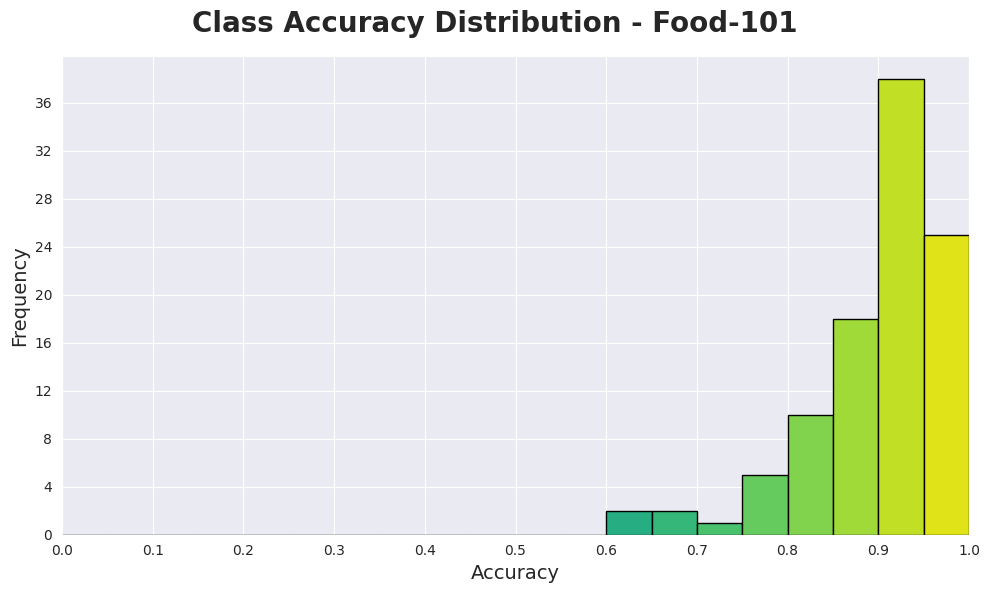

In [30]:
plot_per_class_accuracies(
    food101_per_class_acc,
    'Food-101',
    num_bins=20
)

#### FER2013

In [31]:
swin_fer2013 = Backbone(model_names['Swin'], num_classes=len(fer2013_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([7]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([7, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
get_model_params(swin_fer2013)

Parameters: 86.75M


In [33]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = train_model(
    swin_fer2013,
    fer2013_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

100%|██████████| 3589/3589 [08:42<00:00,  6.87it/s]


Epochs: 1/10 | train_loss: 1.0186 | train_acc: 0.6177


100%|██████████| 3589/3589 [08:41<00:00,  6.88it/s]


Epochs: 2/10 | train_loss: 0.7707 | train_acc: 0.7149


100%|██████████| 3589/3589 [08:41<00:00,  6.89it/s]


Epochs: 3/10 | train_loss: 0.5875 | train_acc: 0.7866


100%|██████████| 3589/3589 [08:41<00:00,  6.88it/s]


Epochs: 4/10 | train_loss: 0.4025 | train_acc: 0.8583


100%|██████████| 3589/3589 [08:42<00:00,  6.87it/s]


Epochs: 5/10 | train_loss: 0.2608 | train_acc: 0.9069


100%|██████████| 3589/3589 [08:43<00:00,  6.86it/s]


Epochs: 6/10 | train_loss: 0.1729 | train_acc: 0.9402


100%|██████████| 3589/3589 [08:42<00:00,  6.87it/s]


Epochs: 7/10 | train_loss: 0.1296 | train_acc: 0.9559


100%|██████████| 3589/3589 [08:43<00:00,  6.86it/s]


Epochs: 8/10 | train_loss: 0.1091 | train_acc: 0.9627


100%|██████████| 3589/3589 [08:44<00:00,  6.84it/s]


Epochs: 9/10 | train_loss: 0.0976 | train_acc: 0.9668


100%|██████████| 3589/3589 [08:43<00:00,  6.86it/s]

Epochs: 10/10 | train_loss: 0.0846 | train_acc: 0.9700


In [34]:
fer2013_loss, fer2013_acc, fer2013_per_class_acc = evaluate_model(
    swin_fer2013,
    fer2013_test,
    config
)

100%|██████████| 449/449 [00:23<00:00, 19.04it/s]

test_loss: 1.4763 | test_acc: 0.7038


In [35]:
fer2013_accs.append(fer2013_acc)

In [36]:
fer2013_per_class_acc

{'angry': 0.6415478615071283,
 'disgust': 0.7818181818181819,
 'fear': 0.5984848484848485,
 'happy': 0.8839590443686007,
 'sad': 0.5976430976430976,
 'surprise': 0.7475961538461539,
 'neutral': 0.6533546325878594}

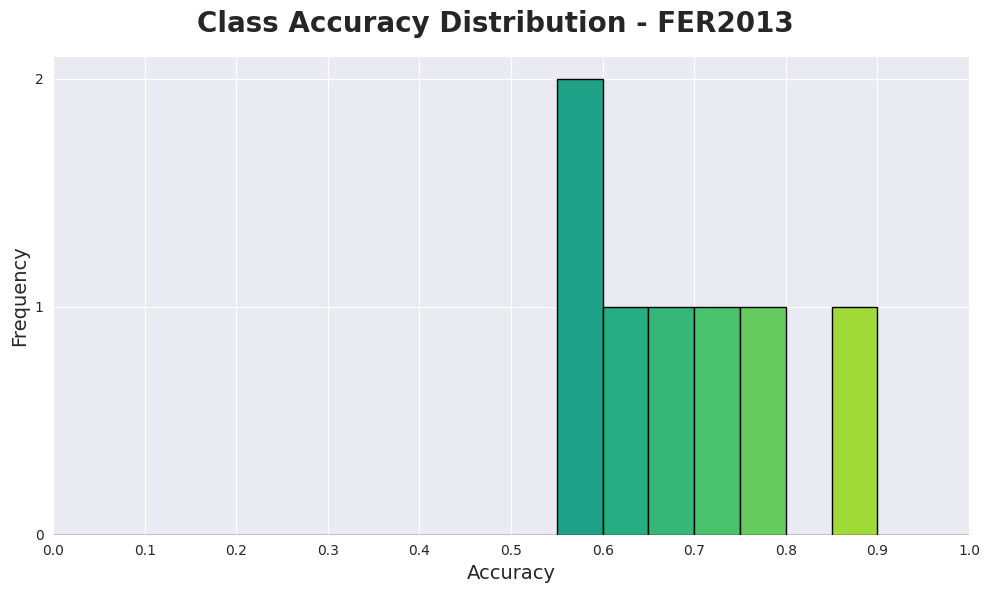

In [37]:
plot_per_class_accuracies(
    fer2013_per_class_acc,
    'FER2013',
    num_bins=20
)

#### PCam

In [38]:
swin_pcam = Backbone(model_names['Swin'], num_classes=len(pcam_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([2, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [39]:
get_model_params(swin_pcam)

Parameters: 86.75M


In [40]:
pcam_loss, pcam_acc, pcam_per_class_acc = train_model(
    swin_pcam,
    pcam_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

100%|██████████| 32768/32768 [1:20:42<00:00,  6.77it/s]


Epochs: 1/10 | train_loss: 0.1197 | train_acc: 0.9571


100%|██████████| 32768/32768 [1:21:08<00:00,  6.73it/s]


Epochs: 2/10 | train_loss: 0.0620 | train_acc: 0.9791


100%|██████████| 32768/32768 [1:20:13<00:00,  6.81it/s]


Epochs: 3/10 | train_loss: 0.0408 | train_acc: 0.9863


100%|██████████| 32768/32768 [1:20:16<00:00,  6.80it/s]


Epochs: 4/10 | train_loss: 0.0293 | train_acc: 0.9901


100%|██████████| 32768/32768 [1:20:14<00:00,  6.81it/s]


Epochs: 5/10 | train_loss: 0.0221 | train_acc: 0.9926


100%|██████████| 32768/32768 [1:21:06<00:00,  6.73it/s]


Epochs: 6/10 | train_loss: 0.0183 | train_acc: 0.9938


100%|██████████| 32768/32768 [1:20:24<00:00,  6.79it/s]


Epochs: 7/10 | train_loss: 0.0156 | train_acc: 0.9946


100%|██████████| 32768/32768 [1:20:27<00:00,  6.79it/s]


Epochs: 8/10 | train_loss: 0.0140 | train_acc: 0.9951


100%|██████████| 32768/32768 [1:20:27<00:00,  6.79it/s]


Epochs: 9/10 | train_loss: 0.0131 | train_acc: 0.9955


100%|██████████| 32768/32768 [1:20:43<00:00,  6.77it/s]


Epochs: 10/10 | train_loss: 0.0121 | train_acc: 0.9958


In [41]:
pcam_loss, pcam_acc, pcam_per_class_acc = evaluate_model(
    swin_pcam,
    pcam_test,
    config
)

100%|██████████| 4096/4096 [03:42<00:00, 18.39it/s]

test_loss: 0.9419 | test_acc: 0.8503


In [42]:
pcam_accs.append(pcam_acc)

In [43]:
pcam_per_class_acc

{'healthy lymph node tissue': 0.9898724910011591,
 'lymph node tumor tissue': 0.710630762654943}

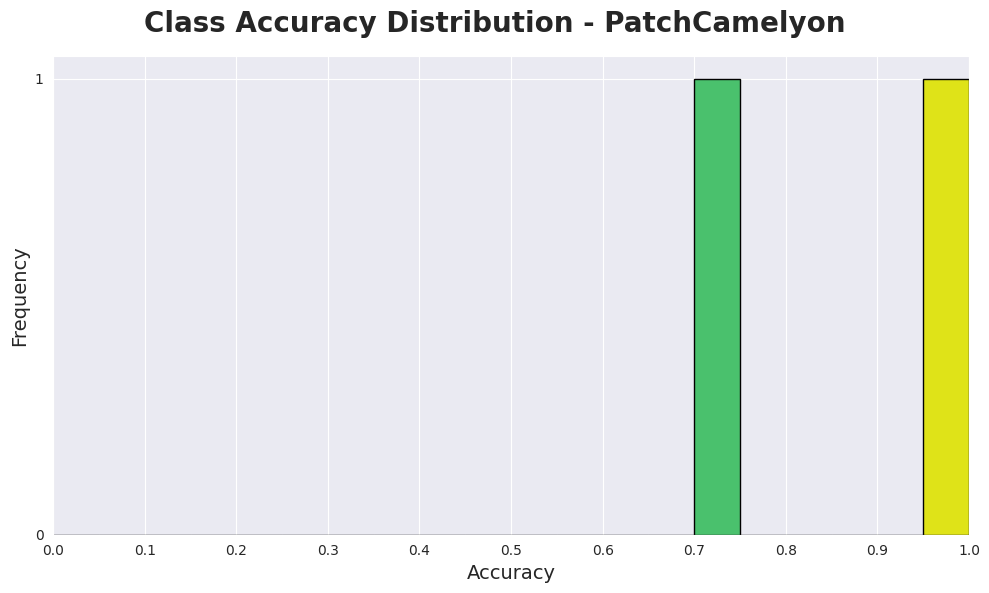

In [44]:
plot_per_class_accuracies(
    pcam_per_class_acc,
    'PatchCamelyon',
    num_bins=20
)

#### SUN397

In [ ]:
swin_sun397 = Backbone(model_names['Swin'], num_classes=len(sun397_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([397]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([397, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
get_model_params(swin_sun397)

Parameters: 87.15M


In [ ]:
sun397_loss, sun397_acc, sun397_per_class_acc = train_model(
    swin_sun397,
    sun397_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

100%|██████████| 9516/9516 [28:46<00:00,  5.51it/s]


Epochs: 1/10 | train_loss: 1.3184 | train_acc: 0.6754


100%|██████████| 9516/9516 [27:29<00:00,  5.77it/s]


Epochs: 2/10 | train_loss: 0.5758 | train_acc: 0.8280


100%|██████████| 9516/9516 [27:30<00:00,  5.76it/s]


Epochs: 3/10 | train_loss: 0.3393 | train_acc: 0.8938


100%|██████████| 9516/9516 [27:27<00:00,  5.77it/s]


Epochs: 4/10 | train_loss: 0.1989 | train_acc: 0.9382


100%|██████████| 9516/9516 [27:13<00:00,  5.83it/s]


Epochs: 5/10 | train_loss: 0.1307 | train_acc: 0.9596


100%|██████████| 9516/9516 [27:16<00:00,  5.81it/s]


Epochs: 6/10 | train_loss: 0.0972 | train_acc: 0.9705


100%|██████████| 9516/9516 [27:18<00:00,  5.81it/s]


Epochs: 7/10 | train_loss: 0.0782 | train_acc: 0.9760


100%|██████████| 9516/9516 [27:23<00:00,  5.79it/s]


Epochs: 8/10 | train_loss: 0.0671 | train_acc: 0.9803


100%|██████████| 9516/9516 [27:33<00:00,  5.75it/s]


Epochs: 9/10 | train_loss: 0.0623 | train_acc: 0.9815


100%|██████████| 9516/9516 [27:16<00:00,  5.81it/s]


Epochs: 10/10 | train_loss: 0.0557 | train_acc: 0.9835


In [ ]:
sun397_loss, sun397_acc, sun397_per_class_acc = evaluate_model(
    swin_sun397,
    sun397_test,
    config
)

100%|██████████| 2719/2719 [03:42<00:00, 12.25it/s]


test_loss: 1.1193 | test_acc: 0.7786


In [ ]:
sun397_accs.append(sun397_acc)

In [ ]:
get_top_5_accuracies(sun397_per_class_acc)

[('arrival gate (outdoor)', 1.0),
 ('ball pit', 1.0),
 ('batters box', 1.0),
 ('bullring', 1.0),
 ('car interior (backseat)', 1.0)]

In [ ]:
get_bottom_5_accuracies(sun397_per_class_acc)

[('bistro (indoor)', 0.05263157894736842),
 ('library (outdoor)', 0.09523809523809523),
 ('recreation room', 0.1111111111111111),
 ('hunting lodge (outdoor)', 0.125),
 ('parking garage (outdoor)', 0.13636363636363635)]

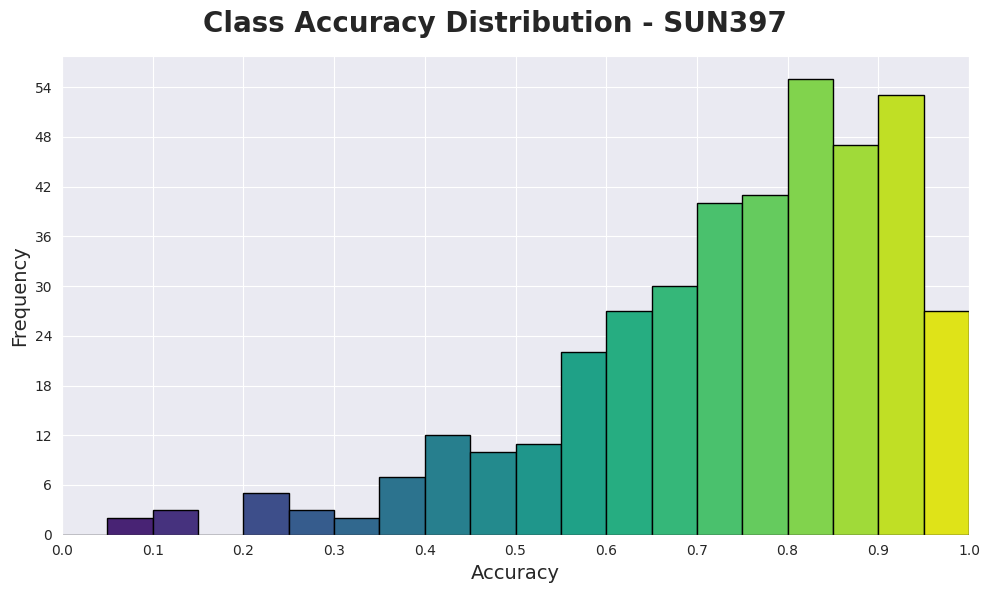

In [ ]:
plot_per_class_accuracies(
    sun397_per_class_acc,
    'SUN397',
    num_bins=20
)

#### DTD

In [ ]:
swin_dtd = Backbone(model_names['Swin'], num_classes=len(dtd_train.get_labels()))

Some weights of SwinForImageClassification were not initialized from the model checkpoint at microsoft/swin-base-patch4-window7-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([47]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 1024]) in the checkpoint and torch.Size([47, 1024]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
get_model_params(swin_dtd)

Parameters: 86.79M


In [ ]:
dtd_loss, dtd_acc, dtd_per_class_acc = train_model(
    swin_dtd,
    dtd_train,
    config,
    'swin',
    use_val=False,
    fine_tune=True,
)

100%|██████████| 470/470 [01:23<00:00,  5.66it/s]


Epochs: 1/10 | train_loss: 1.8001 | train_acc: 0.5577


100%|██████████| 470/470 [01:22<00:00,  5.73it/s]


Epochs: 2/10 | train_loss: 0.4067 | train_acc: 0.8939


100%|██████████| 470/470 [01:21<00:00,  5.74it/s]


Epochs: 3/10 | train_loss: 0.1393 | train_acc: 0.9676


100%|██████████| 470/470 [01:22<00:00,  5.73it/s]


Epochs: 4/10 | train_loss: 0.0551 | train_acc: 0.9918


100%|██████████| 470/470 [01:21<00:00,  5.78it/s]


Epochs: 5/10 | train_loss: 0.0392 | train_acc: 0.9928


100%|██████████| 470/470 [01:21<00:00,  5.80it/s]


Epochs: 6/10 | train_loss: 0.0368 | train_acc: 0.9910


100%|██████████| 470/470 [01:20<00:00,  5.82it/s]


Epochs: 7/10 | train_loss: 0.0660 | train_acc: 0.9846


100%|██████████| 470/470 [01:20<00:00,  5.82it/s]


Epochs: 8/10 | train_loss: 0.0482 | train_acc: 0.9899


100%|██████████| 470/470 [01:21<00:00,  5.80it/s]


Epochs: 9/10 | train_loss: 0.0216 | train_acc: 0.9965


100%|██████████| 470/470 [01:20<00:00,  5.81it/s]

Epochs: 10/10 | train_loss: 0.0100 | train_acc: 0.9976


In [ ]:
dtd_loss, dtd_acc, dtd_per_class_acc = evaluate_model(
    swin_dtd,
    dtd_test,
    config
)

100%|██████████| 235/235 [00:18<00:00, 12.72it/s]

test_loss: 0.8221 | test_acc: 0.8218


In [ ]:
dtd_accs.append(dtd_acc)

In [ ]:
get_top_5_accuracies(dtd_per_class_acc)

[('crystalline', 1.0),
 ('potholed', 1.0),
 ('knitted', 0.975),
 ('scaly', 0.975),
 ('studded', 0.975)]

In [ ]:
get_bottom_5_accuracies(dtd_per_class_acc)

[('stained', 0.55),
 ('blotchy', 0.6),
 ('bumpy', 0.6),
 ('pitted', 0.6),
 ('grid', 0.675)]

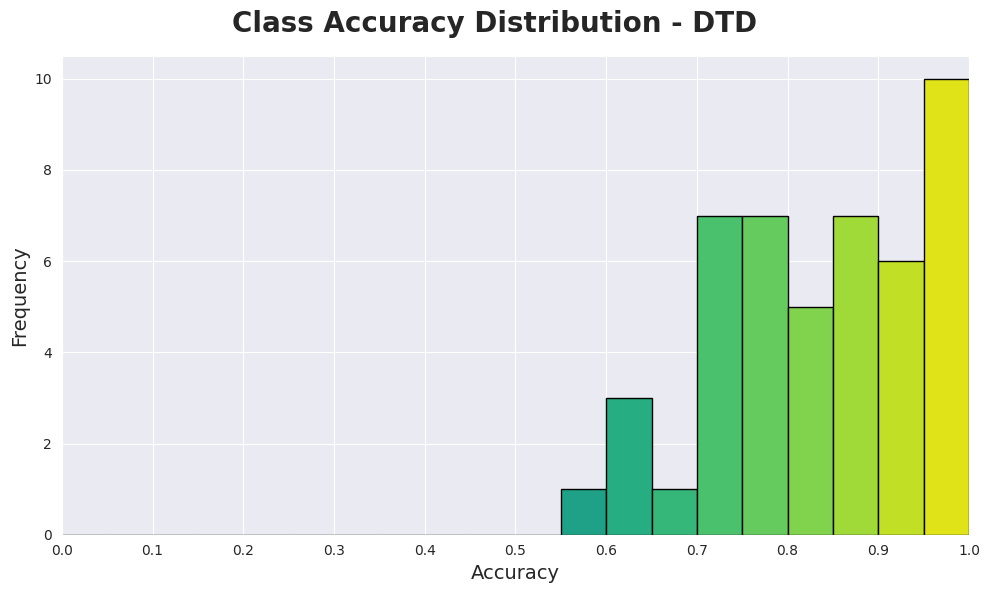

In [ ]:
plot_per_class_accuracies(
    dtd_per_class_acc,
    'DTD',
    num_bins=20
)

### Results

Display the results of the analysis in dataframe.

In [ ]:
results = [
    resisc45_accs,
    food101_accs,
    fer2013_accs,
    pcam_accs,
    sun397_accs,
    dtd_accs,
]

In [ ]:
labels = ['RESISC45', 'Food-101', 'FER2013', 'PatchCamelyon', 'SUN397', 'DTD']

In [ ]:
acc_dict = create_accuracy_dict(
    results,
    labels
)

In [ ]:
df = pd.DataFrame(results, columns=['fine-tuning'], index=labels)
df

,fine-tuning
RESISC45,0.958095
Food-101,0.895842
FER2013,0.703817
PatchCamelyon,0.850311
SUN397,0.778621
DTD,0.821809
